<a href="https://colab.research.google.com/github/oteejay/tensorflow-hands-on/blob/main/01_tensorflow_nn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [29]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

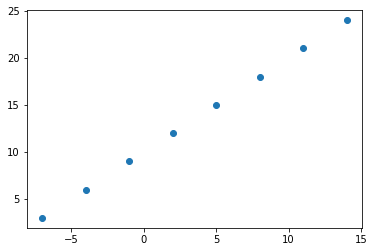

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3.0, 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X, y)

In [31]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [32]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [33]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [34]:
X[0].shape, y[0].shape

((), ())

In [35]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [36]:
tf.expand_dims(X, axis=0)

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]])>

In [37]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

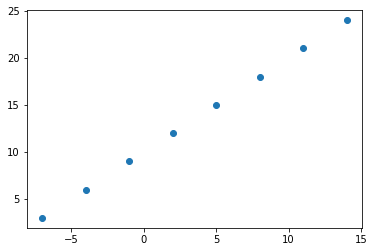

In [38]:
plt.scatter(X, y)

## Steps in modelling with TesnsorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which telss our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequetial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 961ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 40ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [40]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [41]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

array([[12.716021]], dtype=float32)

In [42]:
y_pred + 10.9748

array([[23.69082]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more (give the model more examples to learn from).

In [43]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [44]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [45]:
# Let's see if our model's prediction has improved.
model.predict([17])

array([[29.739855]], dtype=float32)

In [46]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 20ms/step 

In [47]:
model.predict([17])

array([[27.159163]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evalueate it -> Tweak it -> Fit it -> Evaluate it...
```

When it comes to evaluation... therea are 3 words you should memorize: 

> "Visualize, Visualize, Visualize"

It's a good idea to visualize
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [48]:
# Make a bigger dataset
X = tf.range(-100, 100, 4, dtype=tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [49]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

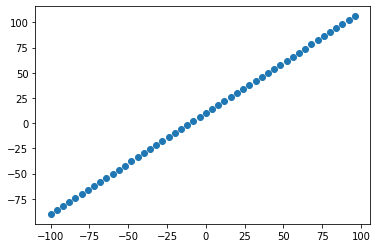

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70% - 80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10% - 15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10% - 15% of the total data available.

In [51]:
# Check the length of how many samples we have
len(X)

50

In [52]:
tf.size(X).numpy()

50

In [53]:
# Split the data into train and test sets
X_train = X[:40] # first 80% of the data
X_test = X[40:] # last 20% of the data

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and test sets... let's visualize them again!

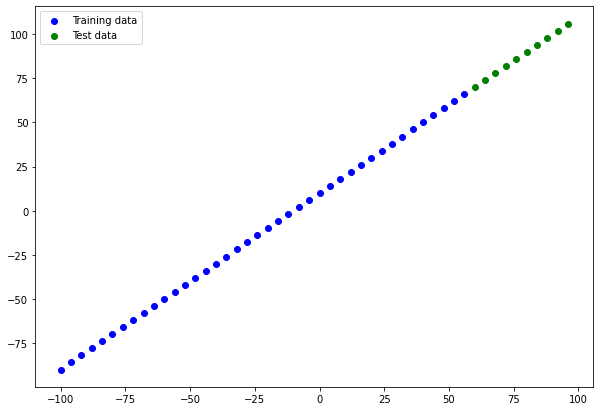

In [54]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# Show a legend
plt.legend()

In [55]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [56]:
model.summary()

ValueError: ignored

In [58]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(10, input_shape=[1], name="middle_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model1")

# 2. Compile the model (same as above) 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])


In [59]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 middle_layer (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typical when you bring already learn patterns or parameters from other models during **transfer learning**).

In [60]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

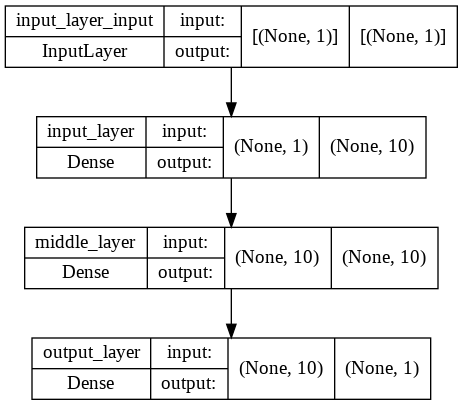

In [61]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth models.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [62]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.968254],
       [ 75.031235],
       [ 79.09422 ],
       [ 83.157196],
       [ 87.220184],
       [ 91.283165],
       [ 95.346146],
       [ 99.40913 ],
       [103.472115],
       [107.535095]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

🔑 **Note** If you feel like you are goind to reuse some kind of functionality in th future, it is a good idea to turn it into a function.

In [64]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to groud truth tables.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot training data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()

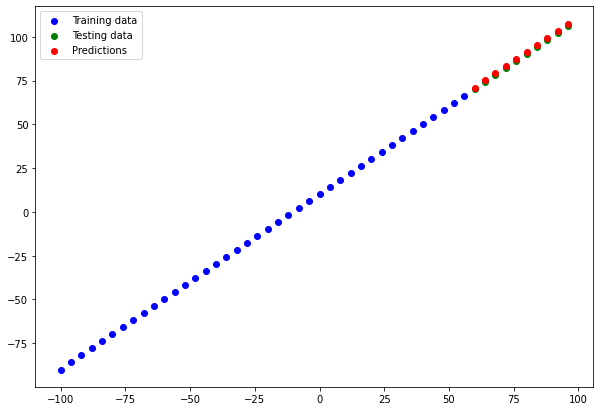

In [65]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evealuate your model's performance.

Since we are working on a regression, two of the main metrics: 
* MAE - mean absolute error, "on averge, how wrong is each of my model's predictions
* MSE - mean square error, "square the average errors"

In [66]:
# Evaluae the model on the test

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 1.2517 - mae: 1.2517


[1.251673936843872, 1.251673936843872]

In [67]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.225397, 14.181259, 11.962311, 10.568561, 10.      , 10.256633,
       11.338458, 13.245476, 15.977692, 19.535095], dtype=float32)>

In [68]:
tf.math.reduce_mean(mae)

<tf.Tensor: shape=(), dtype=float32, numpy=13.42909>

In [69]:
y_test.shape

TensorShape([10])

In [70]:
y_pred.shape

(10, 1)

In [71]:
mae = tf.metrics.mean_absolute_error(tf.reshape(y_test, shape=(10, 1)), y_pred)
tf.reduce_mean(mae)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2516739>

In [72]:
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5994134>

In [73]:
# Make some function to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
2. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [74]:
X_train

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>

In [75]:
y_train

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>

In [76]:
tf.expand_dims(X_train, axis=-1)

<tf.Tensor: shape=(40, 1), dtype=float32, numpy=
array([[-100.],
       [ -96.],
       [ -92.],
       [ -88.],
       [ -84.],
       [ -80.],
       [ -76.],
       [ -72.],
       [ -68.],
       [ -64.],
       [ -60.],
       [ -56.],
       [ -52.],
       [ -48.],
       [ -44.],
       [ -40.],
       [ -36.],
       [ -32.],
       [ -28.],
       [ -24.],
       [ -20.],
       [ -16.],
       [ -12.],
       [  -8.],
       [  -4.],
       [   0.],
       [   4.],
       [   8.],
       [  12.],
       [  16.],
       [  20.],
       [  24.],
       [  28.],
       [  32.],
       [  36.],
       [  40.],
       [  44.],
       [  48.],
       [  52.],
       [  56.]], dtype=float32)>

In [77]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

In [79]:
y_pred_1

NameError: ignored

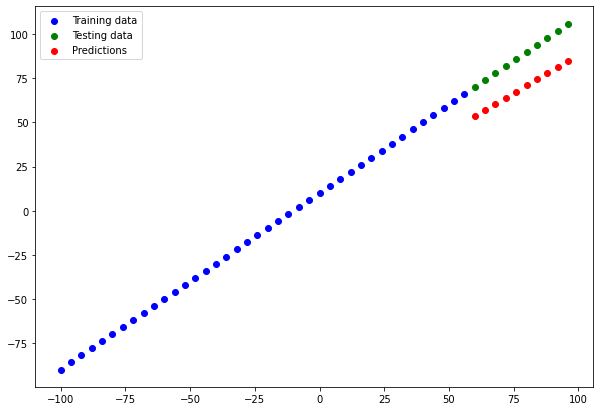

In [80]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [81]:
# Calculate the model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [82]:
# set random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse")

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

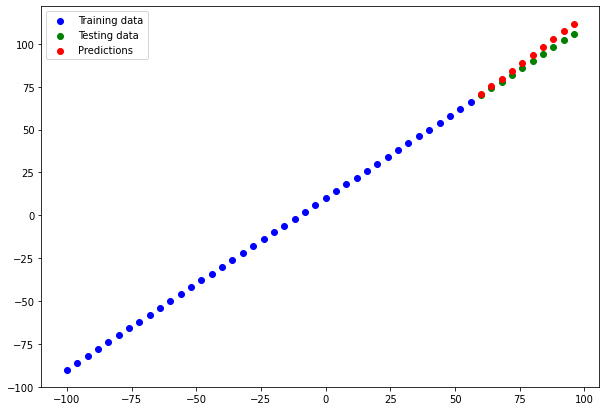

In [83]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [84]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [85]:
# set random seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=========================

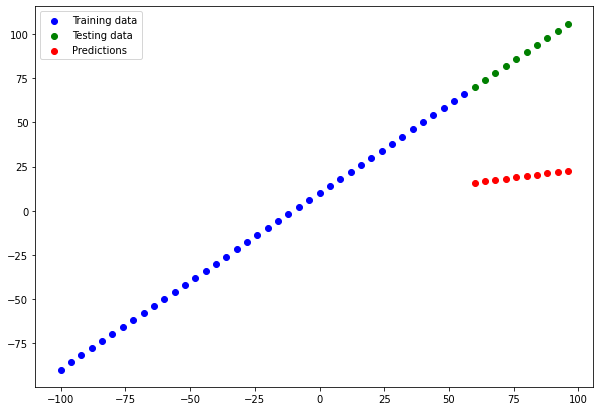

In [86]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [87]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We have run a few experiments, let's compare the results

In [88]:
# Let's compare our model's results using a pandas DataFrame 
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2` performed best...

In [89]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which do not work and in turn, get closer to figuring our what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you will want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we will see this one later).
* Weights & Baises - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside Google  Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's to:

1. The SaveModel features
2. The HDF5 form

In [90]:
# Save model
model_2.save("best_model_SavedModel_format")

In [91]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [92]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compare model_2 predictions with SavedModel format model predictions

model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [95]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Check t0 see if loaded .h5 model predictions match model_2
model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab

1. You can go to the "File" tab and right click on the file you are after and click "Download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there. (see 2nd code cell below).

In [97]:
# Download a file from Google Colab 
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/Colab Notebooks"

In [99]:
!ls "/content/drive/MyDrive/Colab Notebooks"

00_tensorflow_fundamentals.ipynb   best_model_HDF5_format.h5
01_tensorflow_nn_regression.ipynb


## A Larger Example

In [100]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [101]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
# Let's try and one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [103]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [104]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [105]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [106]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [107]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [108]:
# Check the results of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Right now it looks like out model is not performing too well... let's try and improve it

To (try) improve our model, we will run 2 experiments:

1. Add an extra layer with more hidden units
2. Train for longer
3. (insert your own experiment here)

In [119]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0815 - mae:

In [120]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [121]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [126]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
history = insurance_model3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 11ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 10ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0815 - ma

In [127]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [125]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

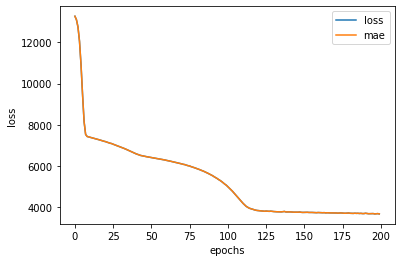

In [128]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you are working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [130]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column trainsformer
ct = make_column_transformer(
  (MinMaxScaler(), ['age', "bmi", "children"]), # turn all values in these column between 0 and 1
  (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [131]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [133]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [134]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [135]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [136]:
insurance_model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1, 100)            1200      
                                                                 
 dense_29 (Dense)            (None, 1, 10)             1010      
                                                                 
 dense_30 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [138]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [139]:
# Evaluate our insurance model trained on normalized data
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]